# **PROCEDIMIENTO DE REVISIÓN DEL CÓDIGO** #

### Primera parte

El primer paso para llevar a cabo este proceso fue revisar la factorización PLU, primeramente para matrices chicas (de hasta 10^3 x 10^3). Para ello el primer programa que realizamos para detectar errores, fue el de **"revision_factorizacion_PLU.py"** (se encuentra en la carpeta de /src/test_algorithms) en el cual se encuentra la función "revision_PLU" y cuyo algoritmo es el siguiente:

1) Genera matrices aleatorias de diferentes dimensiones y entradas.<br>
2) Intenta calcular la inversa de la matriz A generada aleatoriamente, para que el producto con ésta regrese la matriz identidad y así garantizar que sea no singular.<br>
3) Realiza la factorización PLU con el algoritmo realizado por el equipo de programación.<br>
4) Compara los resultados del algoritmo desarrollado, cuyo output es **P,L,U** con las que se obtienen del paquete "scipy" con una tolerancia absoluta de 10^-05.<br>
5) Si la condición de la comparación del paso anterior es "verdadera" se arroja un status "Correcto", si esta condición no se cumple devuelve un archivo con la matriz A y las matrices PLU de ambos algoritmos. El archivo mencionado se ocupó para levantar algunos issues.<br>
6) Por último, devuelve un dataframe con las siguientes variables: dimensión, status_plu, tiempo_plu (lo que tardó en correr la función para obtener las matrices PLU) y matrices_incorrectas.<br>

In [1]:
import sys
sys.path.append('./../../')

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

#Own Library modules
import src
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

#Funciones de revisión
from src.test_algorithms import revision_factorizacion_PLU

Los argumentos que recibe la primera función **revision_PLU** :<br>
* Nombre del archivo, en este caso "resultados.txt"<br>
* Número de corridas que se refiere a cuantas veces corrimos el algoritmo para hacer la revisión, en este caso 15<br>
* Límite inferior de la dimensión de la matriz, en este caso 10^2<br>
* Límite superior de la dimensiónd de la matriz, en este caso 10^2+1<br>
* Límite inferior de las entradas de A, es decir el valor de cada uno de los aij que puede tener la matriz, en este caso -99.<br>
* Límite superior de las entradas de A, es decir el valor de cada uno de los aij que puede tener la matriz, en este caso 99.<br>

In [11]:
revision_factorizacion_PLU.revision_PLU('resultados.txt',15,10**2,10**2+1,-99,99)

,dimension,status_plu,tiempo_plu,matrices_incorrectas
0,100,Incorrecto,2.166639,P
1,100,Incorrecto,1.791332,P
2,100,Incorrecto,2.083854,P
3,100,Incorrecto,1.797055,P
4,100,Incorrecto,1.114240,P
5,100,Incorrecto,1.779011,P
6,100,Incorrecto,1.264601,P
7,100,Incorrecto,1.596583,P
8,100,Incorrecto,1.181513,P
9,100,Incorrecto,1.489248,P


#### Comentarios
<i>Al ejecutar repetidas veces este programa, detectamos que la matriz que siempre salía con status incorrecto era la matriz de permutación (P) que, al revisar la documentación de "scipy", observamos que A=PLU, mientras que en nuestro algoritmo se cumple que PA=LU, por lo que P en ambos algoritmos no iban a ser iguales.</i>

### Segunda parte

Una vez detectado lo anterior, se decidió ya no usar el paquete "scipy" y sólo validar haciendo que PA=LU. 

Por lo que se realizó otro script llamado **"revision_modular.py"** (se encuentra en la carpeta de /src/test_algorithms) en el cual, se encuentran principalmente las funciones de **revision_PLU**, **revision_x** y **revision_bloques**.

En la de revision_PLU se hace básicamente lo descrito en la primera parte de la revisión, pero se eliminó lo siguiente:<br>

1) Genera matrices aleatorias de diferentes dimensiones y entradas.<br>
<del>2) Intenta calcular la inversa de calcular su inversa de la matriz A generada aleatoriamente, para que el producto con ésta regrese la matriz identidad y así garantizar que sea no singular.</del>->Este paso se eliminó porque se implementó en el código que realiza la factorización PLU.<br>
3) Realiza la factorización PLU con el algoritmo realizado por el equipo de programación.<br>
<del>4) Compara los resultados del algoritmo desarrollado, cuyo output es **P,L,U** con las que se obtienen del paquete "scipy" con una tolerancia absoluta de 10^-05.</del>->Este paso se modificó a comprobar que PA=LU por la conclusión de la primera revisión.<br>
5) Si la condición de la comparación del paso anterior es "verdadera" se arroja un status "Correcto",<del> si esta condición no se cumple devuelve un archivo con la matriz A y las matrices PLU de ambos algoritmos.</del>.<br>
6) Por último, devuelve un dataframe con las siguientes variables: dimensión, el número de condición de la matriz A, tiempo_plu (lo que tardó en correr la función para obtener las matrices PLU) y el estatus del algoritmo.<br>


In [2]:
from src.test_algorithms import revision_modular

Los argurmentos que recibe la función **revision_PLU**:<br>
* Número de corridas que se refiere a cuantas veces corrimos el algoritmo para hacer la revisión, en este caso 3.<br>
* Límite inferior de la dimensión de la matriz, en este caso 10^3<br>
* Límite superior de la dimensiónd de la matriz, en este caso 10^3+1<br>
* Límite inferior de las entradas de A, es decir el valor de cada uno de los aij que puede tener la matriz, en este caso -99.<br>
* Límite superior de las entradas de A, es decir el valor de cada uno de los aij que puede tener la matriz, en este caso 99.<br>

In [4]:
revision_modular.revision_PLU(3,10**3,10**3+1,-99,99)

,dimension_A,condicion_A,tiempo_plu,status_plu
0,1000,4812.657477,285.446078,Correcto
1,1000,2119.335085,264.439540,Correcto
2,1000,8348.188228,275.432172,Correcto


#### Comentarios
<i>Al hacer varias corridas detectamos que el programa estaba arrojando cálculos correctos.</i>

### Tercera parte

Lo siguiente fue validar el valor de x con la función "revision_x" y cuyo algoritmo es el siguiente:<br>
1) Genera matrices aleatorias de diferentes dimensiones y entradas.<br>
2) Se calcula el número de condición de la matriz A generada en el punto anterior.<br>
3) Se genera aleatoriamente un vector x ("real")<br>
4) Se multiplica el vector x ("real") por la matriz A para obtener el lado derecho del sistema de ecuaciones lineales (b)<br>
5) Se ejecuta el algoritmo de programación para resolver el sistema de ecuaciones $AX=b$ y obtener la x estimada.<br>
6) Se comparan las x's con una tolerancia absoluta de 10^-05 y sí se cumple esto se arroja un status "Correcto" y se obtiene el promedio del error absoluto de ambos vectores, el error relativo y residual relativo.<br>
7) Se imprime un dataframe con las siguientes variables: dimension_A, condicion_A, tiempo_x (lo que tardó en correr la función para obtener el valor de x), estado_x, error_absoluto, error_relativo, residual_relativo y tipo_matriz.

Los argumentos que recibe la función **revision_x** :<br>
* Número de corridas que se refiere a cuantas veces corrimos el algoritmo para hacer la revisión, en este caso 3<br>
* Límite inferior de la dimensión de la matriz, en este caso 10^3<br>
* Límite superior de la dimensión de la matriz, en este caso 10^3+1<br>
* Límite inferior de las entradas de A, es decir el valor de cada uno de los aij que puede tener la matriz, en este caso -99.<br>
* Límite superior de las entradas de A, es decir el valor de cada uno de los aij que puede tener la matriz, en este caso 99.<br>

In [5]:
revision_modular.revision_x(3,10**3,10**3+1,-99,99)

,dimension_A,condicion_A,tiempo_x,estado_x,error_absoluto,error_relativo,residual_relativo,tipo_matriz
0,1000,10310.566861,268.641398,Correcto,1.148511e-09,1.018616e-12,2.609652e-14,no singular
1,1000,32040.560090,289.721234,Correcto,1.163101e-08,1.017352e-11,3.281351e-14,no singular
2,1000,8742.245391,264.023247,Correcto,3.517318e-10,3.042630e-13,2.997676e-14,no singular


#### Comentarios
<i>Al hacer varias corridas detectamos que el programa estaba arrojando cálculos correctos para la X estimada en comparación con la X "real"</i>

### Cuarta parte

Finalmente pasamos a la revisión del algoritmo por bloques "solve_blocks", el cual integra el algoritmo de la factorización PLU (previamente revisado), la solución de X por bloques fue revisada con la funcion **"revision_bloques"** y el algoritmo que sigue esta función es el siguiente:<br>
1) Genera matrices aleatorias de diferentes dimensiones y entradas.<br>
2) Genera el vector de X's aleatorio de dimensión n.<br>
3) Se calcula B con la operación $AX=B$.<br>
4) Se calcula el número de condición de la matriz A generada.<br>
5) Se ejecuta el algoritmo de programación para resolver X por bloques.<br>
6) Se calcula el error absoluto entre la <i>Xestimada</i> y <i>Xreal</i>, para posteriormente calcular el promedio de esos errores absolutos, el error relativo y el residual relativo.<br>
7) Se comparan las X's con una tolerancia absoluta de 10^-05 y sí se cumple esto se arroja un status "Correcto".<br>
8) Se imprime un dataframe con las siguientes variables: dimension_A, condicion_A, tiempo_bloques (lo que tardó en correr la función por bloques para resolver X), el error_absoluto, error_relativo, residual_relativo, tipo_matriz y dimension_bloque.

In [6]:
bloques=revision_modular.revision_bloques(5,10**2,10**3+1,-99,99)

Los argumentos que recibe la función **revision_bloques** :<br>
* Número de corridas que se refiere a cuantas veces corrimos el algoritmo para hacer la revisión, en este caso 5<br>
* Límite inferior de la dimensión de la matriz, en este caso 10^2<br>
* Límite superior de la dimensión de la matriz, en este caso 10^3+1<br>
* Límite inferior de las entradas de A, es decir el valor de cada uno de los aij que puede tener la matriz, en este caso -99.<br>
* Límite superior de las entradas de A, es decir el valor de cada uno de los aij que puede tener la matriz, en este caso 99.<br>

In [7]:
bloques

,dimension_A,condicion_A,tiempo_bloques,solucion_bloques,error_absoluto,error_relativo,residual_relativo,tipo_matriz,dimension_bloque
0,334,460.325705,5.310523,Correcto,4.503115e-12,9.657566e-14,2.175258e-14,no singular,167
1,950,1468.600910,118.598635,Correcto,1.169623e-09,2.592397e-11,3.313047e-12,no singular,475
2,633,2790.141445,35.145644,Correcto,5.046530e-10,1.107066e-11,1.997213e-13,no singular,317
3,838,22025.819914,84.248332,Correcto,8.318706e-10,1.850994e-11,2.368326e-13,no singular,419
4,401,398.584691,14.111989,Correcto,5.809524e-11,1.286096e-12,2.712052e-13,no singular,201


In [8]:
bloques2=revision_modular.revision_bloques(3,10**3,10**3+1,-99,99)

In [9]:
bloques2

,dimension_A,condicion_A,tiempo_bloques,solucion_bloques,error_absoluto,error_relativo,residual_relativo,tipo_matriz,dimension_bloque
0,1000,1977.910619,139.298590,Correcto,1.852722e-10,4.082432e-12,4.706669e-13,no singular,500
1,1000,3205.329746,144.337149,Correcto,1.473687e-09,3.273287e-11,1.151572e-12,no singular,500
2,1000,4972.175876,139.091270,Correcto,3.663196e-10,7.828654e-12,5.588517e-13,no singular,500


In [10]:
bloques.sort_values(by=['dimension_A'],inplace=True)
dimension = bloques['dimension_A']
tiempo=bloques['tiempo_bloques']

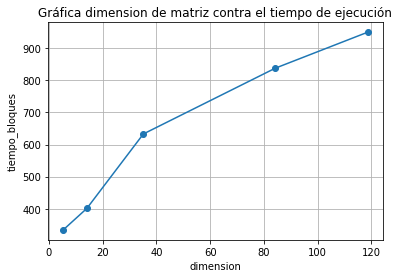

In [11]:
import matplotlib.pyplot as plt
plt.plot(tiempo,dimension,'o-')
plt.title('Gráfica dimension de matriz contra el tiempo de ejecución')
plt.xlabel('dimension')
plt.ylabel('tiempo_bloques')
plt.grid()
plt.show()

#### Comentarios
<i>Al hacer varias corridas detectamos que el programa estaba arrojando cálculos correctos para la X estimada con el algoritmo de bloques, y de igual forma obtuvimos que el error absoluto es en casi todos los casos de orden 10^-10 y el error relativo de orden 10^-12 lo cual indica que nuestro algoritmo tiene una buena aproximación. 
    
Además, hicimos una gráfica de la dimensión de la matriz contra el tiempo de ejecución del algoritmo y se obtiene que a mayor dimensión de la matriz generada mayor tiempo de ejecución, lo cual era lo esperado.</i>

**Sin embargo, es importante señalar que el tiempo de ejecución baja considerablemente para matrices de 10^3 x 10^3 usando el algoritmo por bloques.**

Para el caso de matrices singulares, el algoritmo por bloques arroja el siguiente mensaje:

In [12]:
import numpy as np

In [13]:
#definimos matriz singular y su lado derecho
A=np.array([[1,2],
          [1,2]])
b=np.array([3,3])

In [14]:
revision_modular.resuelve_bloques(A,b)

ValueError: Please enter a non-singular matrix.

Este código se ejecutó con una computadora con las siguientes especificaciones:

* MacBook Pro (13-inch, 2017, Two Thunderbolt 3 ports)
* Procesador 2.3 GHz Intel Core i5
* 8 GB 2133 MHz LPDDR3